In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import requests
import time
import pprint
import csv
fire = "data/forest_fire_1998-2017_new.csv"
rain = "data/precipitation_new.csv"
fire_df = pd.read_csv(fire)
rain_df = pd.read_csv(rain)

In [2]:
fire_df.head()

Ano State Month  Number      Date
0  1998    AC   Jan       0  1/1/1998
1  1999    AC   Jan       0  1/1/1999
2  2000    AC   Jan       0  1/1/2000
3  2001    AC   Jan       0  1/1/2001
4  2002    AC   Jan       0  1/1/2002

In [3]:
rain_df.head()

state Unnamed: 1  year month  precipitation
0    AC  1/31/1998  1998   Jan          335.5
1    AC  2/28/1998  1998   Feb          299.4
2    AC  3/31/1998  1998   Mar          396.7
3    AC  4/30/1998  1998   Apr          102.7
4    AC  5/31/1998  1998   May           19.0

In [4]:
new_fire_df = fire_df.rename(columns={"Ano":"Year"})

In [5]:
new_fire_df = new_fire_df.drop(["Date"], axis=1)

In [6]:
new_fire_df = new_fire_df.rename(columns={"Number": "Number of Fires"})

In [7]:
new_fire_df.head()

Year State Month  Number of Fires
0  1998    AC   Jan                0
1  1999    AC   Jan                0
2  2000    AC   Jan                0
3  2001    AC   Jan                0
4  2002    AC   Jan                0

In [8]:
newdf = new_fire_df.drop(["Month"], axis=1)
newdf.head()

Year State  Number of Fires
0  1998    AC                0
1  1999    AC                0
2  2000    AC                0
3  2001    AC                0
4  2002    AC                0

In [9]:
newdf1 = newdf.groupby(["Year"])

In [10]:
sumALLbrazil = newdf1.sum()["Number of Fires"]
sumALLbrazil

Year
1998    123881
1999    132526
2000     97541
2001    137926
2002    220015
2003    208476
2004    248928
2005    224294
2006    123327
2007    206412
2008    117993
2009    111763
2010    223228
2011    131271
2012    163353
2013    105572
2014    170259
2015    209296
2016    171132
2017    246289
Name: Number of Fires, dtype: int64

In [11]:
sumALL_df = pd.DataFrame([sumALLbrazil])
sumALL_df

Year               1998    1999   2000    2001    2002    2003    2004  \
Number of Fires  123881  132526  97541  137926  220015  208476  248928   

Year               2005    2006    2007    2008    2009    2010    2011  \
Number of Fires  224294  123327  206412  117993  111763  223228  131271   

Year               2012    2013    2014    2015    2016    2017  
Number of Fires  163353  105572  170259  209296  171132  246289

In [12]:
firenumbers = [123881, 132526, 97541, 137926, 220015, 208476, 248928, 224294, 123327, 206412, 117993, 111763, 223228, 131271, 163353, 105572, 170259, 209296, 171132, 246289]
x_axis = np.arange(len(sumALLbrazil))

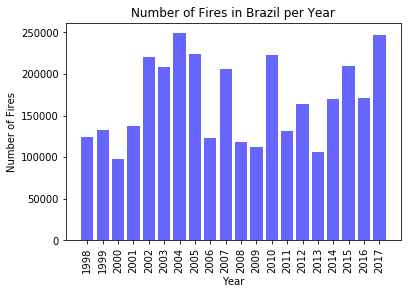

In [13]:
plt.bar(x_axis, firenumbers, color='b', alpha=0.6, align="center")

plt.title("Number of Fires in Brazil per Year")
plt.xlabel("Year")
plt.ylabel("Number of Fires")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'], rotation=90)

plt.savefig("data/NumberofFiresBrazil.png")

In [14]:
newnew = new_fire_df.drop(["Month"], axis=1)

by_state = newnew.groupby(["State", "Year"])

state_sum = by_state.sum()["Number of Fires"]
state_sum_df = pd.DataFrame(state_sum)
state_sum_df.head(5)

Number of Fires
State Year                 
AC    1998              730
      1999              333
      2000              434
      2001              828
      2002             3491

In [15]:
states = np.unique(newdf["State"])
states

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [16]:
newdf

Year State  Number of Fires
0     1998    AC                0
1     1999    AC                0
2     2000    AC                0
3     2001    AC                0
4     2002    AC                0
5     2003    AC               10
6     2004    AC                0
7     2005    AC               12
8     2006    AC                4
9     2007    AC                0
10    2008    AC                0
11    2009    AC                0
12    2010    AC                1
13    2011    AC                0
14    2012    AC                0
15    2013    AC                0
16    2014    AC                0
17    2015    AC                1
18    2016    AC               12
19    2017    AC                0
20    1998    AC                0
21    1999    AC                0
22    2000    AC                0
23    2001    AC                0
24    2002    AC                1
25    2003    AC                0
26    2004    AC                3
27    2005    AC                0
28    2006    AC                0
29    2007    AC                5
...    ...   ...              ...
6424  2007    TO              147
6425  2008    TO              104
6426  2009    TO              251
6427  2010    TO              283
6428  2011    TO              144
6429  2012    TO              179
6430  2013    TO              345
6431  2014    TO              451
6432  2015    TO              833
6433  2016    TO              623
6434  2017    TO              434
6435  1998    TO                9
6436  1999    TO               16
6437  2000    TO               20
6438  2001    TO               21
6439  2002    TO               39
6440  2003    TO              109
6441  2004    TO               96
6442  2005    TO               53
6443  2006    TO               15
6444  2007    TO               13
6445  2008    TO                7
6446  2009    TO               46
6447  2010    TO               72
6448  2011    TO              105
6449  2012    TO              128
6450  2013    TO               85
6451  2014    TO              223
6452  2015    TO              373
6453  2016    TO              119

[6454 rows x 3 columns]

In [17]:
convert_dict = {'Year': str}

new_df = newdf.astype(convert_dict) 
print(new_df.dtypes)

Year               object
State              object
Number of Fires     int64
dtype: object


ValueError: too many values to unpack (expected 1)

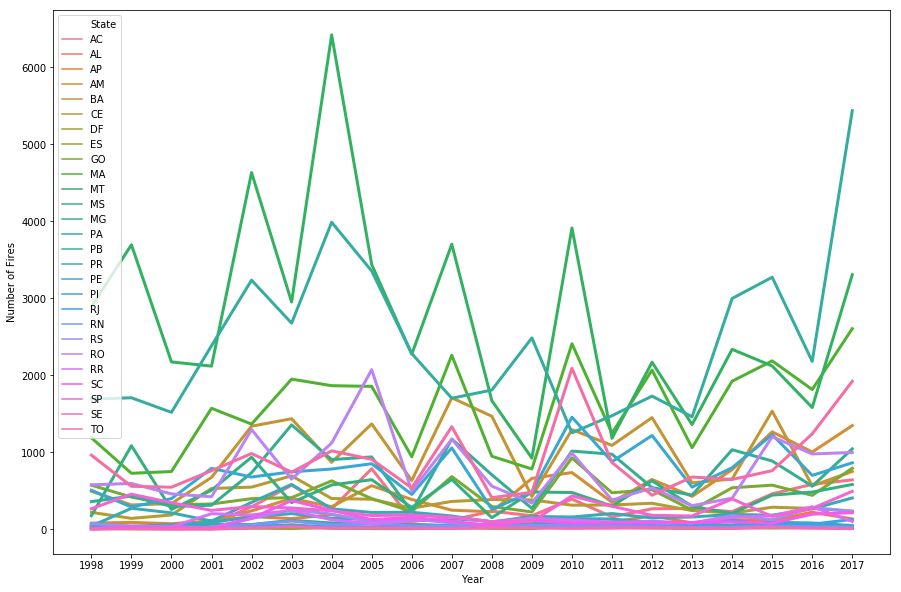

In [32]:
#change year to string 
fig, ax = plt.subplots(figsize=(15, 10), )
ax = sns.lineplot(x = 'Year', y = "Number of Fires", data = new_df, hue = 'State', lw = 3, 
                  err_style = None,)
tick_locations = [value for value in x_axis]
handles, = states
plt.xticks(tick_locations, x_axis, rotation=90)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Fires")
ax.set_title('Fires by State by Year', fontweight = "bold", fontsize = 15)
ax.legend(handles, loc="best", prop={'size': 12})
plt.tight_layout()
ax.grid()

ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.legend(loc='best', bbox_to_anchor=(1, 1), fontsize=8)

plt.savefig("data/FiresBrazilAll.png")

plt.show()

In [22]:
Xstate_mean_df = state_sum.groupby(["State"]).mean()
Xstate_mean_df = pd.DataFrame(Xstate_mean_df)
Xstate_mean_df

Number of Fires
State                 
AC             3417.25
AL              232.20
AM             5873.35
AP             1255.80
BA            11348.95
CE             4008.10
DF              178.05
ES              327.30
GO             5598.50
MA            18763.95
MG             8461.15
MS             5665.00
MT            32729.50
PA            28892.05
PB              639.35
PE             1224.90
PI             8935.35
PR             2620.95
RJ              585.15
RN              471.30
RO             9269.35
RR             1472.70
RS             1444.60
SC             1360.45
SE              161.85
SP             3115.40
TO            10621.60

In [23]:
AmazonAC = Xstate_mean_df.loc[('AC')]
AmazonAM = Xstate_mean_df.loc[('AM')]
AmazonAP = Xstate_mean_df.loc[('AP')]
AmazonMA = Xstate_mean_df.loc[('MA')]
AmazonMT = Xstate_mean_df.loc[('MT')]
AmazonPA = Xstate_mean_df.loc[('PA')]
AmazonRO = Xstate_mean_df.loc[('RO')]
AmazonRR = Xstate_mean_df.loc[('RR')]
AmazonTO = Xstate_mean_df.loc[('TO')]

data = [AmazonAC, AmazonAM, AmazonAP, AmazonMA, AmazonMT, AmazonPA, AmazonRO, AmazonRR, AmazonTO]

Amazon_mean_df = pd.DataFrame(data) 
Amazon_mean_df

Amazon_mean_df.to_csv("data/Amazon_mean_df.csv")

In [24]:
Amazon_mean_df

Number of Fires
AC          3417.25
AM          5873.35
AP          1255.80
MA         18763.95
MT         32729.50
PA         28892.05
RO          9269.35
RR          1472.70
TO         10621.60

In [25]:
Amazon_mean_df.index.names = ['States']
Amazon_mean_df

Number of Fires
States                 
AC              3417.25
AM              5873.35
AP              1255.80
MA             18763.95
MT             32729.50
PA             28892.05
RO              9269.35
RR              1472.70
TO             10621.60

In [26]:
xaxis = list(Amazon_mean_df.index)
xaxis

['AC', 'AM', 'AP', 'MA', 'MT', 'PA', 'RO', 'RR', 'TO']

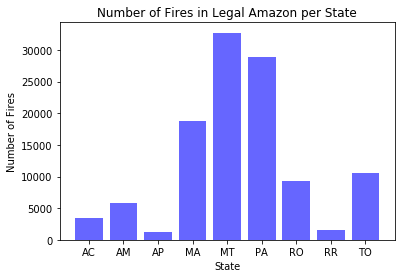

<Figure size 432x288 with 0 Axes>

In [27]:
plt.bar(xaxis,Amazon_mean_df["Number of Fires"], color='b', alpha=0.6, align="center")

plt.title("Number of Fires in Legal Amazon per State")
plt.xlabel("State")
plt.ylabel("Number of Fires")

plt.show()

plt.savefig("data/LegalAmazonFires.png")

In [28]:
state_sum = by_state.sum()["Number of Fires"]
state_sum_df = pd.DataFrame(state_sum)
state_sum_df.head(5)

Number of Fires
State Year                 
AC    1998              730
      1999              333
      2000              434
      2001              828
      2002             3491

In [29]:
YearAC = state_sum_df.loc["AC"]
YearAC = YearAC.rename(columns={"Number of Fires": "AC"})
YearAC


YearAM = state_sum_df.loc["AM"]
YearAM = YearAM.rename(columns={"Number of Fires": "AM"})
YearAM

YearAP = state_sum_df.loc["AP"]
YearAP = YearAP.rename(columns={"Number of Fires": "AP"})
YearAP

YearMA = state_sum_df.loc["MA"]
YearMA = YearMA.rename(columns={"Number of Fires": "MA"})
YearMA

YearMT = state_sum_df.loc["MT"]
YearMT = YearMT.rename(columns={"Number of Fires": "MT"})
YearMT

YearPA = state_sum_df.loc["PA"]
YearPA = YearPA.rename(columns={"Number of Fires": "PA"})
YearPA

YearRO = state_sum_df.loc["RO"]
YearRO = YearRO.rename(columns={"Number of Fires": "RO"})
YearRO

YearRR = state_sum_df.loc["RR"]
YearRR = YearRR.rename(columns={"Number of Fires": "RR"})
YearRR

YearTO = state_sum_df.loc["TO"]
YearTO = YearTO.rename(columns={"Number of Fires": "TO"})
YearTO

dfs = [YearAC, YearAM, YearAP, YearMA, YearMT, YearPA, YearRO, YearRR, YearTO]

from functools import reduce

df_ys_merged = reduce(lambda left,right: pd.merge(left,right,on=['Year'],
                                            how='outer'), dfs)
df_ys_merged

AC     AM    AP     MA     MT     PA     RO    RR     TO
Year                                                            
1998   730    946   278  14236  34647  20282   6917    21  11536
1999   333   1061   101   8711  44312  20479   7124   220   6679
2000   434    853   253   8983  26064  18207   5498   362   6542
2001   828   1297  1301  18839  25408  28587   5059  2416   9113
2002  3491   2852  1957  16372  55562  38804  15524  2224  11787
2003  6859   4789  1652  23382  35406  32100   7803  2919   8890
2004  3160   3504  2261  22361  77014  47823  13421  1457  12202
2005  9427   6780  1271  22251  41237  40226  24858   860  10885
2006  1456   4634   817  11283  27265  27368   5930  1245   6429
2007  1419   2963   440  27093  44406  20403  14023  1863  15974
2008  2808   2717   785  11363  20033  21684   6710  1131   4915
2009  2095   7915  2127   9381  11069  29806   4096  1687   5749
2010  4684   8826   721  28896  46936  15020  11873  1442  25069
2011  1912   4188  1100  14955  14164  17687   4541  1082  10387
2012  3180   7745  2103  24790  26017  20732   6421  1001   5294
2013  3242   5118   975  12697  16301  17518   3662   994   8127
2014  2740   9288  1490  23059  28024  35948   4832  1868   7748
2015  5512  15170  1366  26222  25429  39253  14410  2062   9123
2016  6993  12023  2653  21766  18952  26143  11724  3499  14854
2017  7042  14798  1465  28639  36344  59771  10961  1101  21129

In [30]:
corr = df_ys_merged.corr()

corr

AC        AM        AP        MA        MT        PA        RO  \
AC  1.000000  0.663806  0.486357  0.594250  0.096825  0.528470  0.655017   
AM  0.663806  1.000000  0.484305  0.604392 -0.199135  0.482284  0.254099   
AP  0.486357  0.484305  1.000000  0.331484  0.030466  0.488873  0.173845   
MA  0.594250  0.604392  0.331484  1.000000  0.344836  0.414328  0.506670   
MT  0.096825 -0.199135  0.030466  0.344836  1.000000  0.398928  0.560778   
PA  0.528470  0.482284  0.488873  0.414328  0.398928  1.000000  0.458804   
RO  0.655017  0.254099  0.173845  0.506670  0.560778  0.458804  1.000000   
RR  0.403011  0.366927  0.660134  0.417542 -0.052409  0.231249  0.148318   
TO  0.393090  0.376825  0.015053  0.662326  0.406721  0.218944  0.431352   

          RR        TO  
AC  0.403011  0.393090  
AM  0.366927  0.376825  
AP  0.660134  0.015053  
MA  0.417542  0.662326  
MT -0.052409  0.406721  
PA  0.231249  0.218944  
RO  0.148318  0.431352  
RR  1.000000  0.169704  
TO  0.169704  1.000000

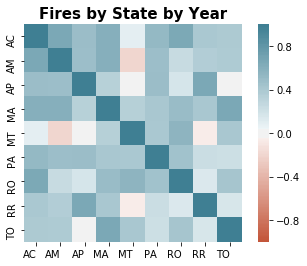

In [31]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0,
    horizontalalignment='right'
);

ax.set_title('Fires by State by Year', fontweight = "bold", fontsize = 15)

plt.savefig("data/StateCorrelationMatrix.png")